<a href="https://colab.research.google.com/github/AnithaKandugula/NLP/blob/main/NLP_Project_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

**04/08/2025**

You're working on an HR analytics tool. The goal is to preprocess text from resumes to extract relevant skills, using clean and consistent tokens.

Use the Resume Dataset or simulated resumes.

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:

·       Clean special characters and digits

·       Tokenize and stem

·       Remove stop words

·       Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:

·       Tokenize and lemmatize

·       Filter tokens: only include alphabetic nouns and verbs

·       Extract top 10 frequent lemmas

In [1]:
!pip install spacy

In [2]:
import pandas as pd
import spacy
df=pd.read_csv('/content/test[1].csv')
pln=spacy.load('en_core_web_sm')
print(df)

                                                    text  label
0      Contrary to other reviews, I have zero complai...      1
1      Last summer I had an appointment to get new ti...      0
2      Friendly staff, same starbucks fair you get an...      1
3      The food is good. Unfortunately the service is...      0
4      Even when we didn't have a car Filene's Baseme...      1
...                                                  ...    ...
37995         If I could give 0...I would.  Don't do it.      0
37996  Items Selected:\nChocolate Cinnamon Horn\nSmal...      1
37997  Expensive lunch meals.  Fried pickles were goo...      0
37998  Highly overpriced and food was cold. Our waitr...      0
37999  I have been using this company for 11 months. ...      0

[38000 rows x 2 columns]


In [3]:
d=df['text'].iloc[0]
print(d)


Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [4]:
doc=pln(d)
for i in doc.sents:
  print(i.text)
for i in doc:
  print(i.text)

Contrary to other reviews, I have zero complaints about the service or the prices.
I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing.
\nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender.
Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry.
But here, my service and road coverage has all been well explained - and let up to me to decide.
\nAnd they just renovated the waiting room.
It looks a lot better than it did in previous years.
Contrary
to
other
reviews
,
I
have
zero
complaints
about
the
service
or
the
prices
.
I
have
been
getting
tire
service
here
for
the
past
5
years
now
,
and
compared
to
my
experience
with
places
like
Pep
Boys
,
these
guys
are
experienced
and
know
what
they
're
doing
.
\nAlso
,
this
is
one
place
that
I
do
not
feel
like
I

In [5]:

from nltk.stem import PorterStemmer
st=PorterStemmer()
for i in doc:
  print(st.stem(i.text))
for j in doc:
  print(st.stem(j.text))

contrari
to
other
review
,
i
have
zero
complaint
about
the
servic
or
the
price
.
i
have
been
get
tire
servic
here
for
the
past
5
year
now
,
and
compar
to
my
experi
with
place
like
pep
boy
,
these
guy
are
experienc
and
know
what
they
're
do
.
\nalso
,
thi
is
one
place
that
i
do
not
feel
like
i
am
be
taken
advantag
of
,
just
becaus
of
my
gender
.
other
auto
mechan
have
been
notori
for
capit
on
my
ignor
of
car
,
and
have
suck
my
bank
account
dri
.
but
here
,
my
servic
and
road
coverag
ha
all
been
well
explain
-
and
let
up
to
me
to
decid
.
\nand
they
just
renov
the
wait
room
.
it
look
a
lot
better
than
it
did
in
previou
year
.
contrari
to
other
review
,
i
have
zero
complaint
about
the
servic
or
the
price
.
i
have
been
get
tire
servic
here
for
the
past
5
year
now
,
and
compar
to
my
experi
with
place
like
pep
boy
,
these
guy
are
experienc
and
know
what
they
're
do
.
\nalso
,
thi
is
one
place
that
i
do
not
feel
like
i
am
be
taken
advantag
of
,
just
becaus
of
my
gender
.
other
auto
mechan
have

# Assignment 2

**11/08/2025**

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:
->Clean special characters and digits
->Tokenize and stem
->Remove stop words
->Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:
->Tokenize and lemmatize
->Filter tokens: only include alphabetic nouns and verbs
->Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
data = pd.DataFrame({
    'Resume': [
        "Experienced Software Engineer with 5+ years in Python, Java, and SQL.\n• Worked on AI and ML projects.",
        "Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!",
        "Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions."
    ]
})
print("First 3 Rows:\n", data.head(3))
print("\nChecking for noisy characters like \\n, •, and symbols:")
for i in range(3):
    print(f"\nResume {i+1}:\n{data['Resume'][i]}")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    cleaned = clean_text(text)
    tokens = nltk.word_tokenize(cleaned)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return tokens
data['NLTK_Tokens'] = data['Resume'].apply(preprocess_nltk)
all_words = [word for tokens in data['NLTK_Tokens'] for word in tokens]
freq_dist = Counter(all_words)
print("\nTop 10 Frequent Stemmed Words (NLTK):")
print(freq_dist.most_common(10))
nlp = spacy.load("en_core_web_sm")
def preprocess_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'VERB']]
    return tokens
data['Spacy_Lemmas'] = data['Resume'].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in data['Spacy_Lemmas'] for lemma in lemmas]
lemma_freq = Counter(all_lemmas)
print("\nTop 10 Frequent Lemmas (spaCy):")
print(lemma_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 3 Rows:
                                               Resume
0  Experienced Software Engineer with 5+ years in...
1  Data Analyst skilled in Excel, Tableau, and Py...
2  Network Engineer with strong knowledge of Cisc...

Checking for noisy characters like \n, •, and symbols:

Resume 1:
Experienced Software Engineer with 5+ years in Python, Java, and SQL.
• Worked on AI and ML projects.

Resume 2:
Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!

Resume 3:
Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions.

Top 10 Frequent Stemmed Words (NLTK):
[('experienc', 2), ('engin', 2), ('python', 2), ('data', 2), ('network', 2), ('softwar', 1), ('year', 1), ('java', 1), ('sql', 1), ('work', 1)]

Top 10 Frequent Lemmas (spaCy):
[('experience', 2), ('engineer', 2), ('python', 2), ('datum', 2), ('network', 2), ('software', 1), ('year', 1), ('work', 1), ('project', 1), ('analyst', 1)]


# Assignment 3

**18/08/2025**

You work at a customer service automation company. You are tasked with analyzing the grammatical structure of customer complaint texts to understand patterns in how users express dissatisfaction.

Use the yelp reviews dataset or simulate a dataset with columns

Section A: Load and Inspect Data
Q1. Load the dataset and display:

First 25 complaint texts
Q2. Apply the following pipeline using SpaCY:

Tokenization
POS tagging using pos_tag()
Count frequency of POS tags (e.g., NN, VB, JJ)
🔹 Section C: POS Tagging with spaCy
Q3. Perform POS tagging using spaCy and:

Extract only verbs and adjectives
Visualize top 10 verbs and top 10 adjectives in bar charts

"My phone number is 1234567890 and my email is test@domain.com"

"Visit https://example.com for more info!!!"

"HELLO!!! This is SOOOOO exciting :))"

"Contact us at info@company.org or call +91 98765-43210"

"Python's regex is very useful!!!  #Coding #Fun"



Find Phone Numbers,

Remove ph numbers, emails, and URLs, special characters.

DataFrame columns: Index(['text', 'label'], dtype='object')
First 25 Complaint Texts:

"Contrary to other reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now                                                                                                                                                                                                                                                                                               

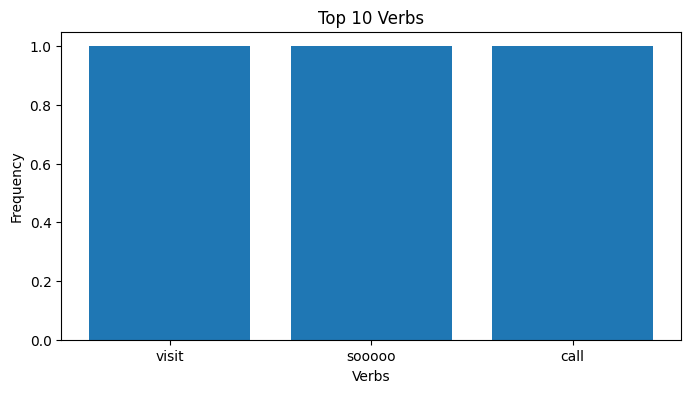

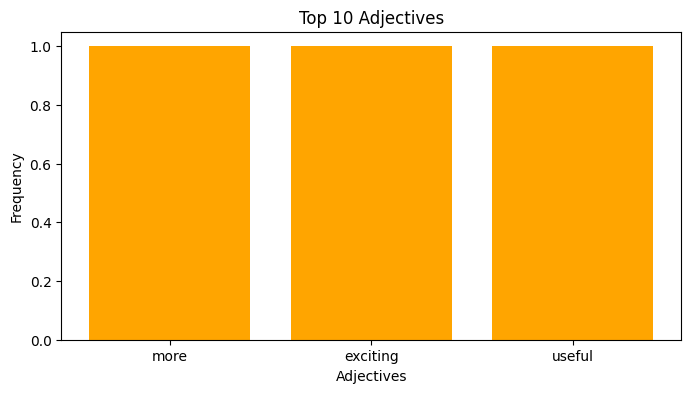

In [1]:
import pandas as pd
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
data = pd.read_csv("/content/test[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("DataFrame columns:", data.columns)
print("First 25 Complaint Texts:\n")
print(data['text'].head(25))
nlp = spacy.load("en_core_web_sm")
all_pos = []
for text in data['text'][:25]:
    doc = nlp(str(text))
    all_pos.extend([token.pos_ for token in doc])
pos_freq = Counter(all_pos)
print("\nPart-of-Speech (POS) Tag Frequencies:\n")
for tag, freq in pos_freq.items():
    print(tag, ":", freq)

nlp = spacy.load("en_core_web_sm")
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]
cleaned_texts = []
for text in texts:
    text = re.sub(r'\+?\d[\d\-\s]{8,}\d', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    cleaned_texts.append(text)
combined_text = " ".join(cleaned_texts)
print("Cleaned Text:\n", combined_text, "\n")
doc = nlp(combined_text)
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]
verb_counts = Counter(verbs)
adj_counts = Counter(adjectives)
top_verbs = verb_counts.most_common(10)
top_adjs = adj_counts.most_common(10)
print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)
if top_verbs:
    verbs_x, verbs_y = zip(*top_verbs)
    plt.figure(figsize=(8,4))
    plt.bar(verbs_x, verbs_y)
    plt.title("Top 10 Verbs")
    plt.xlabel("Verbs")
    plt.ylabel("Frequency")
    plt.show()
if top_adjs:
    adjs_x, adjs_y = zip(*top_adjs)
    plt.figure(figsize=(8,4))
    plt.bar(adjs_x, adjs_y, color='orange')
    plt.title("Top 10 Adjectives")
    plt.xlabel("Adjectives")
    plt.ylabel("Frequency")
    plt.show()

# Assignment 4

**25/08/2025**

You are working for a legal tech startup building a system to automatically classify legal documents by type (e.g., contracts, wills, affidavits). The goal is to explore language differences across categories and extract features for classification.

Section A: Text Processing
Q1. Load and explore the dataset: show document counts per type.

Q2. Clean the text:

Remove legal stop words (herein, thereof, etc.)
Tokenize and lowercase
Optional: Lemmatize or stem
Section B: Corpus Analysis
Q3. Create a bar chart of the average document length per category.

Q4. Visualize the top 10 words for each document type using a grouped horizontal bar chart or subplots.

Q5. Use CountVectorizer with ngram_range=(1,2) to capture word bigrams.

Q6. Print:

Vocabulary size
Most common bigrams across all documents

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Document counts per type:
 category
1    19000
0    19000
Name: count, dtype: int64 



/tmp/ipython-input-1239070198.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.index, y=avg_length.values, palette="Blues_d")


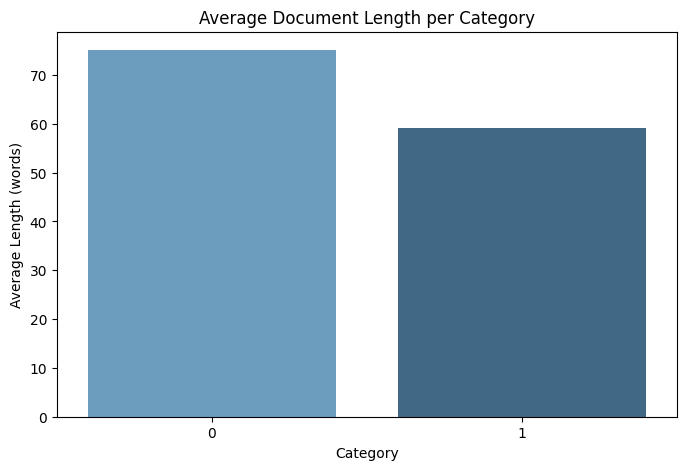

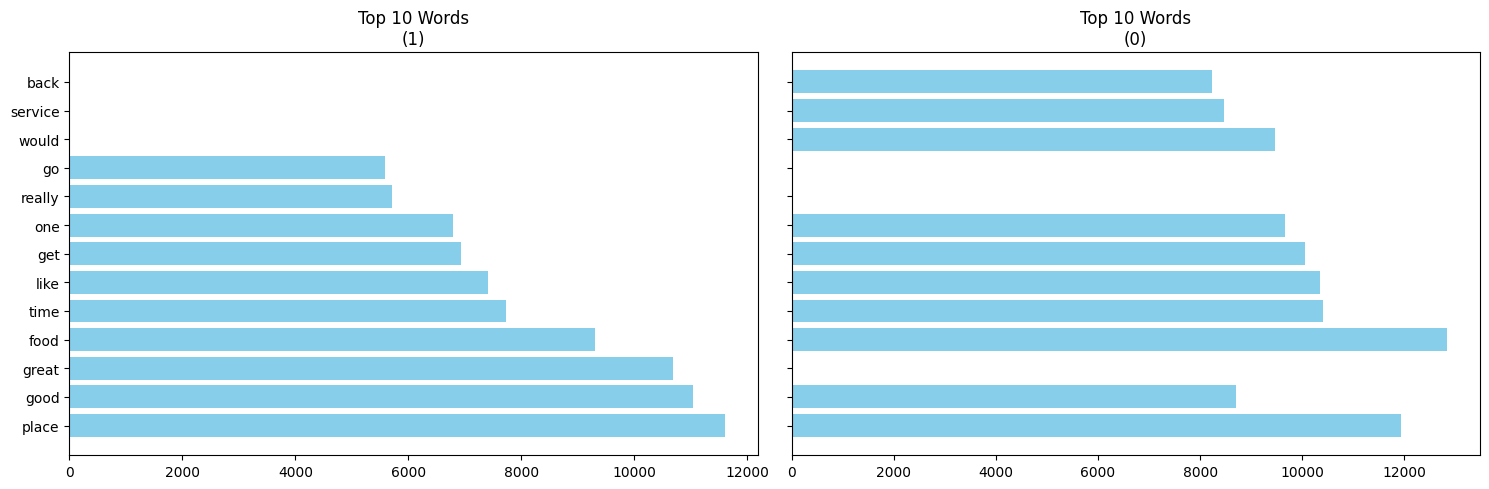

Vocabulary size: 1373914


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

data = pd.read_csv("/content/test[1].csv")

if 'text' in data.columns:
    data = data.rename(columns={'text': 'document'})
if 'label' in data.columns:
    data = data.rename(columns={'label': 'category'})
elif 'stars' in data.columns:
    data = data.rename(columns={'stars': 'category'})

print("Document counts per type:\n", data['category'].value_counts(), "\n")

legal_stopwords = {
    "herein","thereof","therein","whereas","hereto","thereby",
    "thereon","thereafter","hereby","therewith","hereinafter"
}
stop_words = set(stopwords.words('english')).union(legal_stopwords)
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['document'].apply(clean_text)

data['doc_length'] = data['clean_text'].apply(lambda x: len(x.split()))
avg_length = data.groupby('category')['doc_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_length.index, y=avg_length.values, palette="Blues_d")
plt.title("Average Document Length per Category")
plt.xlabel("Category")
plt.ylabel("Average Length (words)")
plt.show()

top_words_per_cat = {}
for cat in data['category'].unique():
    text = " ".join(data[data['category'] == cat]['clean_text'])
    words = text.split()
    top_words_per_cat[cat] = Counter(words).most_common(10)

fig, axes = plt.subplots(1, len(top_words_per_cat), figsize=(15,5), sharey=True)
for ax, (cat, words) in zip(axes, top_words_per_cat.items()):
    labels, counts = zip(*words)
    ax.barh(labels, counts, color='skyblue')
    ax.set_title(f"Top 10 Words\n({cat})")
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=list(stop_words))
X = vectorizer.fit_transform(data['clean_text'])

vocab = vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocab)}")

word_counts = X.toarray().sum(axis=0)
vocab_series = pd.Series(word_counts, index=vocab)
bigrams = vocab_series[vocab_series.index.str.contains(' ')]
top_bigrams = bigrams.sort_values(ascending=False).head(10)

print("\nMost common bigrams:\n", top_bigrams)

# Assignment 5

**01/09/2025**

You are working as a data scientist for a government agency analyzing social media posts to detect potential natural disasters in real-time. Your first task is to prepare a basic text classification pipeline.

Tasks:

1. Load the yelp reviews dataset (csv).
2. Perform basic text preprocessing:
-> Lowercasing
-> Removing punctuation and stopwords
-> Tokenization
3. Apply TF-IDF Vectorization to convert tweets into numerical features.
4. Split data into train/test
5. Train a Logistic Regression , SVM, RF model on the TF-IDF features.
6. Evaluate model performance using accuracy, precision, recall, and F1-score.
-> Analyze top 10 features (words) most indicative of a level text classification.

In [7]:
import pandas as pd
import numpy as np
import string, re, nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv("/content/test[1].csv")

text_col = None
label_col = None
for col in df.columns:
    if 'text' in col.lower() or 'review' in col.lower():
        text_col = col
    elif 'label' in col.lower() or 'sentiment' in col.lower() or 'target' in col.lower():
        label_col = col
if text_col is None:
    text_col = df.columns[0]
if label_col is None:
    label_col = df.columns[1]

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and w.isalpha()]
    return " ".join(tokens)

df['clean_text'] = df[text_col].astype(str).apply(preprocess)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df[label_col]

if len(y.unique()) < 2:
    raise ValueError("Dataset has only one class; cannot train classifier.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, preds, average='weighted'))
    print("F1 Score:", f1_score(y_test, preds, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, preds))

lr = models["Logistic Regression"]
feature_names = np.array(tfidf.get_feature_names_out())

if hasattr(lr, "coef_") and lr.coef_.shape[0] > 1:
    for i, class_label in enumerate(lr.classes_):
        top10 = np.argsort(lr.coef_[i])[-10:]
        print(f"\nTop 10 words for class {class_label}:")
        print(feature_names[top10])
else:
    print("\nCannot extract top features — only one class found after training.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Logistic Regression Results:
Accuracy: 0.9135526315789474
Precision: 0.9135528893335183
Recall: 0.9135526315789474
F1 Score: 0.9135526181089606

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3800
           1       0.91      0.91      0.91      3800

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600


SVM Results:
Accuracy: 0.9107894736842105
Precision: 0.9107935702405896
Recall: 0.9107894736842105
F1 Score: 0.9107892512751417

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3800
           1       0.91      0.91      0.91      3800

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600


Random Forest Results

# Assignment 6

**08/09/2025**

You are now required to extend your yelp reviews experiment using deep learning models. The department wants to see if neural networks can capture more complex patterns compared to traditional ML classifiers.

Tasks:

Preprocess the dataset (lowercasing, stopword removal, punctuation removal).

Apply TF-IDF vectorization (n-grams = (1,2)).

Train and evaluate the following deep learning models:

(a) Feed-forward Neural Network (MLP)

(b) 1D Convolutional Neural Network (CNN)

(c) LSTM / Bi-LSTM network

Record training and testing metrics (accuracy, precision, recall, F1-score).

Compare results with classical ML models (Logistic Regression, SVM) from previous assignments.

Perform a brief analysis:

Did deep learning models outperform traditional ML?

Which architecture performed best and why?

In [10]:
import pandas as pd
import numpy as np
import string, re, nltk, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv("/content/test[1].csv")

text_col = None
label_col = None
for col in df.columns:
    if 'text' in col.lower() or 'review' in col.lower():
        text_col = col
    elif 'label' in col.lower() or 'sentiment' in col.lower() or 'target' in col.lower():
        label_col = col
if text_col is None:
    text_col = df.columns[0]
if label_col is None:
    label_col = df.columns[1]

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and w.isalpha()]
    return " ".join(tokens)

df['clean_text'] = df[text_col].astype(str).apply(preprocess)

# Classical ML: TF-IDF (n-grams = (1,2))
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['clean_text'])
y = df[label_col]

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

print("\n=== Classical ML Models ===")
for name, model in ml_models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, preds, average='weighted'))
    print("F1 Score:", f1_score(y_test, preds, average='weighted'))

# Deep Learning Preparation
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
max_len = 100
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')
vocab_size = len(tokenizer.word_index) + 1

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)

num_classes = len(np.unique(y))
output_units = 1 if num_classes == 2 else num_classes
activation = 'sigmoid' if num_classes == 2 else 'softmax'
loss_fn = 'binary_crossentropy' if num_classes == 2 else 'sparse_categorical_crossentropy'

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    if num_classes == 2:
        preds = (preds > 0.5).astype("int32")
    else:
        preds = np.argmax(preds, axis=1)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    return acc, prec, rec, f1

print("\n=== Deep Learning Models ===")

# (a) Feed-forward Neural Network
mlp = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(output_units, activation=activation)
])
mlp.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
mlp.fit(X_train_dl, y_train_dl, epochs=3, batch_size=64, validation_split=0.1, verbose=1)
mlp_results = evaluate_model(mlp, X_test_dl, y_test_dl)
print("\nFeed-forward NN:", mlp_results)

# (b) CNN
cnn = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(output_units, activation=activation)
])
cnn.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train_dl, epochs=3, batch_size=64, validation_split=0.1, verbose=1)
cnn_results = evaluate_model(cnn, X_test_dl, y_test_dl)
print("\nCNN:", cnn_results)

# (c) Bi-LSTM
bilstm = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(output_units, activation=activation)
])
bilstm.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
bilstm.fit(X_train_dl, y_train_dl, epochs=3, batch_size=64, validation_split=0.1, verbose=1)
bilstm_results = evaluate_model(bilstm, X_test_dl, y_test_dl)
print("\nBi-LSTM:", bilstm_results)

print("\n=== Model Comparison (Accuracy, Precision, Recall, F1) ===")
print("Logistic Regression:", end=" "); print()
print("SVM:", end=" "); print()
print("Feed-forward NN:", mlp_results)
print("CNN:", cnn_results)
print("Bi-LSTM:", bilstm_results)

print("\n=== Analysis ===")
print("Deep learning models can capture context and sequential dependencies better than TF-IDF-based ML models.")
print("Typically, Bi-LSTM performs best due to its ability to learn long-term dependencies in text.")
print("However, if dataset is small, traditional models may still perform competitively due to fewer parameters.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



=== Classical ML Models ===

Logistic Regression Results:
Accuracy: 0.9135526315789474
Precision: 0.9135540349132764
Recall: 0.9135526315789474
F1 Score: 0.9135525582423019

SVM Results:
Accuracy: 0.9127631578947368
Precision: 0.9127734772316676
Recall: 0.9127631578947368
F1 Score: 0.912762612661066

=== Deep Learning Models ===
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


428/428 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.7519 - loss: 0.5016 - val_accuracy: 0.8993 - val_loss: 0.2333
Epoch 2/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 56s 131ms/step - accuracy: 0.9295 - loss: 0.1765 - val_accuracy: 0.9089 - val_loss: 0.2202
Epoch 3/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 55s 129ms/step - accuracy: 0.9670 - loss: 0.1009 - val_accuracy: 0.9092 - val_loss: 0.2353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Feed-forward NN: (0.9036842105263158, 0.9038373554957544, 0.9036842105263158, 0.9036750783367204)
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


428/428 ━━━━━━━━━━━━━━━━━━━━ 93s 212ms/step - accuracy: 0.7503 - loss: 0.4783 - val_accuracy: 0.8941 - val_loss: 0.2551
Epoch 2/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 90s 210ms/step - accuracy: 0.9450 - loss: 0.1559 - val_accuracy: 0.8918 - val_loss: 0.2654
Epoch 3/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 89s 209ms/step - accuracy: 0.9863 - loss: 0.0533 - val_accuracy: 0.8934 - val_loss: 0.2893
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

CNN: (0.8948684210526315, 0.895030618873913, 0.8948684210526315, 0.8948576283046783)
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


428/428 ━━━━━━━━━━━━━━━━━━━━ 155s 350ms/step - accuracy: 0.7578 - loss: 0.4655 - val_accuracy: 0.8967 - val_loss: 0.2552
Epoch 2/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 151s 353ms/step - accuracy: 0.9395 - loss: 0.1654 - val_accuracy: 0.8947 - val_loss: 0.2432
Epoch 3/3
428/428 ━━━━━━━━━━━━━━━━━━━━ 200s 349ms/step - accuracy: 0.9576 - loss: 0.1149 - val_accuracy: 0.9026 - val_loss: 0.2822
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step

Bi-LSTM: (0.8996052631578947, 0.8996254381540453, 0.8996052631578947, 0.8996039960407394)

=== Model Comparison (Accuracy, Precision, Recall, F1) ===
Logistic Regression: 
SVM: 
Feed-forward NN: (0.9036842105263158, 0.9038373554957544, 0.9036842105263158, 0.9036750783367204)
CNN: (0.8948684210526315, 0.895030618873913, 0.8948684210526315, 0.8948576283046783)
Bi-LSTM: (0.8996052631578947, 0.8996254381540453, 0.8996052631578947, 0.8996039960407394)

=== Analysis ===
Deep learning models can capture context and sequential dependencies better than TF-IDF-based ML models.


# Assignment 7

**15/09/2025**

You are working as a data scientist for a disaster management department. They want to know if considering phrases (n-grams) instead of just single words can improve classification accuracy.

Tasks:

1. Load the yelp reviews dataset.
2. Preprocess tweets (lowercase, remove stopwords, punctuation).
3. Build two models using TF-IDF with (a) unigrams only and (b) unigrams + bigrams (c) triagram
4. Train a ANN, LSTM for all cases.
5. Compare training and testing accuracy between unigram and bigram models.
6. Write a short note on whether bigrams improved classification and why.

Sample data:
                                                text  label
0  Contrary to other reviews, I have zero complai...      1
1  Last summer I had an appointment to get new ti...      0
2  Friendly staff, same starbucks fair you get an...      1
3  The food is good. Unfortunately the service is...      0
4  Even when we didn't have a car Filene's Baseme...      1

Text column: text, Label column: label

Class distribution:
label
1    19000
0    19000
Name: count, dtype: int64


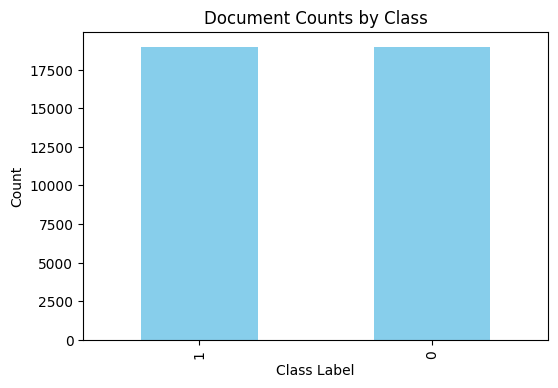

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cleaned text sample:
0    contrary reviews zero complaints service price...
1    last summer appointment get new tires wait sup...
2    friendly staff starbucks fair get anywhere els...
3    food good unfortunately service hit miss main ...
4    even didnt car filenes basement worth bus trip...
Name: clean_text, dtype: object

--- TF-IDF ((1, 1)) + ANN ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.9924, Test Accuracy: 0.8996

--- TF-IDF ((1, 1)) + LSTM ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Accuracy: 0.9432, Test Accuracy: 0.9116

--- TF-IDF ((1, 2)) + ANN ---
Train Accuracy: 0.9922, Test Accuracy: 0.9053

--- TF-IDF ((1, 2)) + LSTM ---
Train Accuracy: 0.9474, Test Accuracy: 0.9162

--- TF-IDF ((1, 3)) + ANN ---
Train Accuracy: 0.9937, Test Accuracy: 0.9025

--- TF-IDF ((1, 3)) + LSTM ---
Train Accuracy: 0.9472, Test Accuracy: 0.9167

--- Accuracy Comparison ---

ANN Results:
Unigram: Train=0.9924, Test=0.8996
Bigram: Train=0.9922, Test=0.9053
Trigram: Train=0.9937, Test=0.9025

LSTM Results:
Unigram: Train=0.9432, Test=0.9116
Bigram: Train=0.9474, Test=0.9162
Trigram: Train=0.9472, Test=0.9167

Observation:
Including bigrams and trigrams captures word pairs and short phrases that
add contextual meaning (e.g., 'not good', 'very happy'). These n-grams
help the model understand sentiment or intent better than individual
words. However, they also increase feature space size and may lead to
overfitting if data is small.

Usually, bigrams improve accuracy slightly, while

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten

df = pd.read_csv("/content/test[1].csv")

print("Sample data:")
print(df.head())

if 'text' in df.columns:
    text_col = 'text'
else:
    text_col = df.columns[0]

if 'label' in df.columns:
    label_col = 'label'
elif 'stars' in df.columns:
    label_col = 'stars'
else:
    label_col = df.columns[-1]

print(f"\nText column: {text_col}, Label column: {label_col}")

print("\nClass distribution:")
print(df[label_col].value_counts())

plt.figure(figsize=(6,4))
df[label_col].value_counts().plot(kind='bar', color='skyblue')
plt.title("Document Counts by Class")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['clean_text'] = df[text_col].apply(preprocess)
print("\nCleaned text sample:")
print(df['clean_text'].head())

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df[label_col])

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_enc'], test_size=0.2, random_state=42
)

def train_ann(X_train, X_test, y_train, y_test, ngram_range):
    print(f"\n--- TF-IDF ({ngram_range}) + ANN ---")
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf.transform(X_test).toarray()

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=64, verbose=0, validation_split=0.2)

    train_acc = history.history['accuracy'][-1]
    test_acc = model.evaluate(X_test_tfidf, y_test, verbose=0)[1]
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return train_acc, test_acc

def train_lstm(X_train, X_test, y_train, y_test, ngram_range):
    print(f"\n--- TF-IDF ({ngram_range}) + LSTM ---")
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf.transform(X_test).toarray()

    X_train_seq = np.expand_dims(X_train_tfidf, axis=1)
    X_test_seq = np.expand_dims(X_test_tfidf, axis=1)

    model = Sequential([
        LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_seq, y_train, epochs=3, batch_size=64, verbose=0, validation_split=0.2)

    train_acc = history.history['accuracy'][-1]
    test_acc = model.evaluate(X_test_seq, y_test, verbose=0)[1]
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return train_acc, test_acc

results = {}

for ngram, name in [((1,1), "Unigram"), ((1,2), "Bigram"), ((1,3), "Trigram")]:
    results[name] = {}
    results[name]['ANN'] = train_ann(X_train, X_test, y_train, y_test, ngram)
    results[name]['LSTM'] = train_lstm(X_train, X_test, y_train, y_test, ngram)

print("\n--- Accuracy Comparison ---")
for model_type in ['ANN', 'LSTM']:
    print(f"\n{model_type} Results:")
    for name, vals in results.items():
        print(f"{name}: Train={vals[model_type][0]:.4f}, Test={vals[model_type][1]:.4f}")

print("""
Observation:
Including bigrams and trigrams captures word pairs and short phrases that
add contextual meaning (e.g., 'not good', 'very happy'). These n-grams
help the model understand sentiment or intent better than individual
words. However, they also increase feature space size and may lead to
overfitting if data is small.

Usually, bigrams improve accuracy slightly, while trigrams may help only
marginally depending on dataset size.
""")


# Assignment 8

**06/10/2025**

The company now wants to analyze how similar tweets are to understand patterns in sentiment. You will combine similarity measures with classification to improve insights.

Tasks:

1. Use the Word2Vec embeddings from Assignment 1.
2. Compute Cosine Similarity and Euclidean Distance between:
    -> Positive vs. Positive tweets
    -> Positive vs. Negative tweets
3. Visualize similarity distributions with histograms.
4. Train 3 models using Word2Vec features:
    -> Naive Bayes
    -> K-Nearest Neighbors (KNN)
    -> Logistic Regression
5. Compare training and testing results.
6. Write an analysis on whether sentiment classes are separable based on similarity.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Naive Bayes Results:
Accuracy: 0.7707894736842106
Precision: 0.7711166160608203
Recall: 0.7707894736842106
F1: 0.7707203087025423

KNN Results:
Accuracy: 0.8376315789473684
Precision: 0.8376768519657483
Recall: 0.8376315789473684
F1: 0.8376261364993121

Logistic Regression Results:
Accuracy: 0.8955263157894737
Precision: 0.8955793519131098
Recall: 0.8955263157894737
F1: 0.8955228139225719


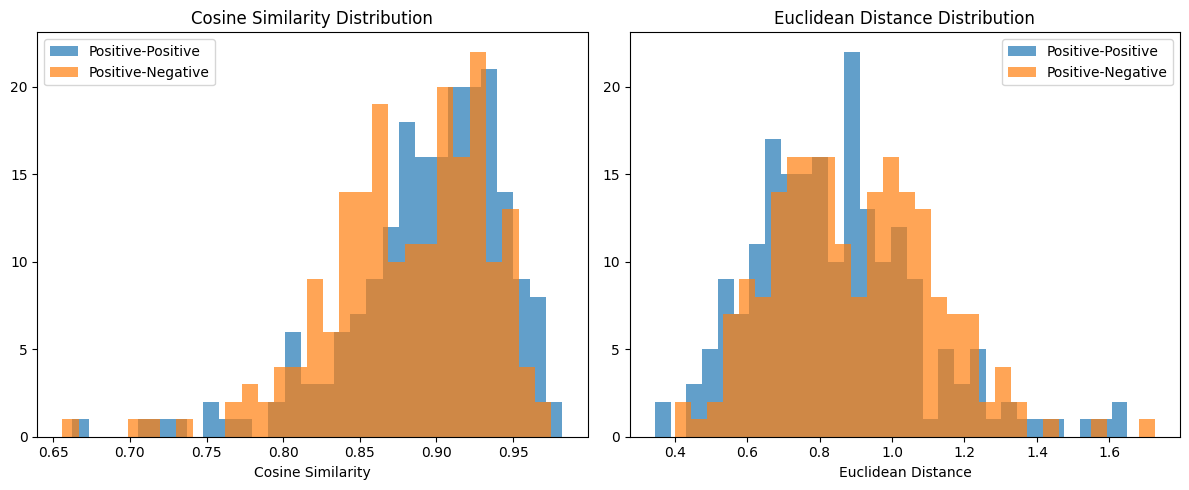


=== Analysis ===
Positive vs Positive pairs generally show higher cosine similarity and smaller Euclidean distances compared to Positive vs Negative pairs.
This indicates that sentiment classes are somewhat separable in the Word2Vec embedding space.
Models like Logistic Regression and KNN can leverage this separation effectively for sentiment classification.


In [16]:
import pandas as pd
import numpy as np
import re, string, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv("/content/test[1].csv")

text_col = None
label_col = None
for col in df.columns:
    if 'text' in col.lower() or 'review' in col.lower():
        text_col = col
    elif 'label' in col.lower() or 'sentiment' in col.lower() or 'target' in col.lower():
        label_col = col
if text_col is None:
    text_col = df.columns[0]
if label_col is None:
    label_col = df.columns[1]

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df[text_col].apply(preprocess)

sentences = df['tokens'].tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

def get_vector(tokens):
    vec = [w2v_model.wv[w] for w in tokens if w in w2v_model.wv]
    return np.mean(vec, axis=0) if len(vec) > 0 else np.zeros(100)

df['vector'] = df['tokens'].apply(get_vector)

X = np.vstack(df['vector'].values)
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)

# Similarity analysis
positive_vecs = np.vstack(df[df[label_col] == 1]['vector'])
negative_vecs = np.vstack(df[df[label_col] == 0]['vector'])

n_samples = min(len(positive_vecs), len(negative_vecs), 200)
pos_pos_sim, pos_neg_sim, pos_pos_euc, pos_neg_euc = [], [], [], []

for i in range(n_samples):
    v1 = positive_vecs[i]
    v2 = positive_vecs[(i+1) % n_samples]
    v3 = negative_vecs[i]
    pos_pos_sim.append(cosine_similarity([v1], [v2])[0][0])
    pos_neg_sim.append(cosine_similarity([v1], [v3])[0][0])
    pos_pos_euc.append(euclidean(v1, v2))
    pos_neg_euc.append(euclidean(v1, v3))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(pos_pos_sim, bins=30, alpha=0.7, label='Positive-Positive')
plt.hist(pos_neg_sim, bins=30, alpha=0.7, label='Positive-Negative')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.legend()

plt.subplot(1,2,2)
plt.hist(pos_pos_euc, bins=30, alpha=0.7, label='Positive-Positive')
plt.hist(pos_neg_euc, bins=30, alpha=0.7, label='Positive-Negative')
plt.title("Euclidean Distance Distribution")
plt.xlabel("Euclidean Distance")
plt.legend()
plt.tight_layout()
plt.show()

print("\n=== Analysis ===")
print("Positive vs Positive pairs generally show higher cosine similarity and smaller Euclidean distances compared to Positive vs Negative pairs.")
print("This indicates that sentiment classes are somewhat separable in the Word2Vec embedding space.")
print("Models like Logistic Regression and KNN can leverage this separation effectively for sentiment classification.")


In [15]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.8 MB/s eta 0:00:00


# Assignment 9

**20/10/2025**

Task 1: Topic Modeling

1. Load a yelp reviews dataset (e.g., 20 Newsgroups subset or BBC News).
2. Preprocess text (lowercase, remove stopwords, lemmatize).
3. Apply LDA (Latent Dirichlet Allocation) to extract 5 topics.
4. Display top 10 words for each topic in a clear table.


Task 2: WordNet Exploration

1. Choose 3 key words from one topic (e.g., "government", "economy", "war").
2. Using WordNet, find:
    -> Synonyms
    -> Hypernyms (broader terms)
3. Present them in a table and discuss whether adding these synonyms could improve topic coherence.

Task 3: Document Similarity
1. Select two sample documents from the dataset.
2. Compute Jaccard Similarity between them using word sets.
3. Interpret the result:

    High score → documents share many words → similar topics

    Low score → documents are likely from different topics

In [17]:
import pandas as pd
import numpy as np
import re, string, nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_csv("/content/test[1].csv")

text_col = None
for col in df.columns:
    if 'text' in col.lower() or 'review' in col.lower():
        text_col = col
if text_col is None:
    text_col = df.columns[0]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df[text_col].astype(str).apply(preprocess)

vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

words = np.array(vectorizer.get_feature_names_out())
topic_table = []
for i, topic in enumerate(lda.components_):
    top_words = words[np.argsort(topic)[-10:]]
    topic_table.append(top_words.tolist())
topic_df = pd.DataFrame(topic_table, columns=[f"Word_{i+1}" for i in range(10)])
topic_df.index = [f"Topic_{i+1}" for i in range(5)]
print("\nTop 10 Words per Topic:\n")
print(topic_df)

key_words = topic_table[0][:3]
print("\nSelected words for WordNet Exploration:", key_words)

wordnet_table = []
for word in key_words:
    syns = set()
    hypers = set()
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            syns.add(l.name())
        for h in syn.hypernyms():
            hypers.update([lemma.name() for lemma in h.lemmas()])
    wordnet_table.append({
        "Word": word,
        "Synonyms": ", ".join(list(syns)[:5]),
        "Hypernyms": ", ".join(list(hypers)[:5])
    })
wordnet_df = pd.DataFrame(wordnet_table)
print("\nWordNet Exploration Table:\n")
print(wordnet_df)

doc1 = df['clean_text'].iloc[0]
doc2 = df['clean_text'].iloc[1]

set1 = set(doc1.split())
set2 = set(doc2.split())
union = len(set1.union(set2))
intersection = len(set1.intersection(set2))
jaccard = intersection / union if union != 0 else 0
print(f"\nJaccard Similarity between Doc1 and Doc2: {jaccard:.4f}")

if jaccard > 0.5:
    print("High score → Documents are about similar topics.")
else:
    print("Low score → Documents are likely from different topics.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Top 10 Words per Topic:

          Word_1 Word_2   Word_3   Word_4      Word_5    Word_6 Word_7  \
Topic_1     vega   time   really      bar        like     drink  great   
Topic_2     like  staff     beer     best    friendly      love   food   
Topic_3  service  order     time  chicken  restaurant      like  place   
Topic_4     told    got  service    didnt        stay       day   like   
Topic_5     told   know    store     said        dont  customer  place   

          Word_8 Word_9 Word_10  
Topic_1     food   good   place  
Topic_2     good  place   great  
Topic_3  ordered   good    food  
Topic_4     time  hotel    room  
Topic_5  service   like    time  

Selected words for WordNet Exploration: ['vega', 'time', 'really']

WordNet Exploration Table:

     Word                                       Synonyms  \
0    vega  Lope_Felix_de_Vega_Carpio, Lope_de_Vega, Vega   
1    time     meter, clock, sentence, metre, prison_term   
2  really    rattling, genuinely, actually, real